In [4]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [6]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/abalone.data",header=None)
df

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
for i in range(7):
    df[i]=LabelEncoder().fit_transform(df[i])

df.columns =["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,66,56,18,715,417,199,0.1500,15
1,2,45,36,17,285,178,94,0.0700,7
2,0,81,67,26,962,480,280,0.2100,9
3,2,63,56,24,718,400,225,0.1550,10
4,1,41,34,15,253,159,76,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,88,73,32,1289,698,475,0.2490,11
4173,2,93,71,26,1411,832,426,0.2605,10
4174,2,95,78,40,1727,994,571,0.3080,9
4175,0,100,80,29,1610,1005,518,0.2960,10


In [8]:
for i in df.columns:
    print(df[i].value_counts())

2    1528
1    1342
0    1307
Name: Sex, dtype: int64
100    94
85     94
90     93
91     92
95     87
       ..
0       1
133     1
1       1
5       1
132     1
Name: Length, Length: 134, dtype: int64
73     139
78     120
63     111
83     110
77     100
      ... 
105      1
110      1
107      1
2        1
106      1
Name: Diameter, Length: 111, dtype: int64
29    267
27    220
30    217
34    211
31    205
24    202
32    193
26    189
28    182
25    169
23    169
33    160
19    145
21    135
22    133
35    131
17    124
20    114
36    103
37    103
18     91
38     78
15     76
16     74
39     68
14     61
13     47
40     45
12     39
42     31
11     26
10     25
41     23
9      18
43     17
7      13
44     13
8      11
45     10
5       6
6       6
46      6
4       5
47      4
48      3
3       2
2       2
0       2
1       1
49      1
50      1
Name: Height, dtype: int64
280     8
1671    7
1416    7
660     7
237     7
       ..
46      1
2335    1
2327    1
2382  

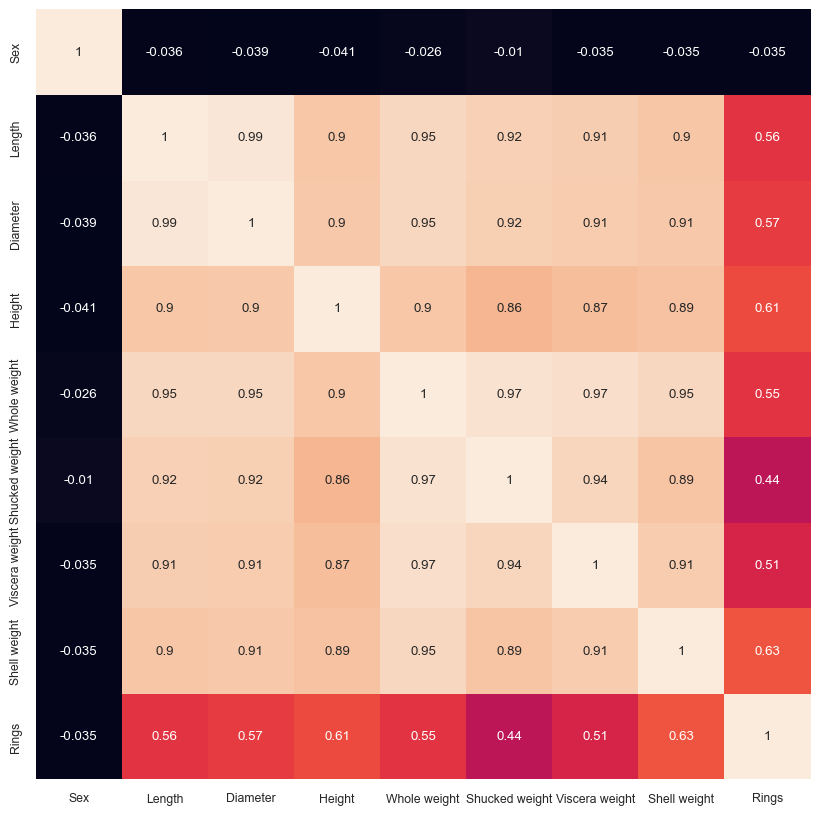

In [10]:
df_corr=df.corr()
#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [11]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [12]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터 변환
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df
for i in df.head():
    scaled_df[i]=LabelEncoder().fit_transform(scaled_df[i])

scaled_df.drop('Sex', axis=1,inplace=True)
scaled_df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,66,56,18,715,417,199,263,14
1,45,36,17,285,178,94,113,6
2,81,67,26,962,480,280,374,8
3,63,56,24,718,400,225,273,9
4,41,34,15,253,159,76,87,6
...,...,...,...,...,...,...,...,...
4172,88,73,32,1289,698,475,442,10
4173,93,71,26,1411,832,426,463,9
4174,95,78,40,1727,994,571,550,8
4175,100,80,29,1610,1005,518,530,9


In [13]:
# 데이터 분류
X=scaled_df.drop('Rings',axis=1)
y=scaled_df['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X.head())
print(y.value_counts())

   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      66        56      18           715             417             199   
1      45        36      17           285             178              94   
2      81        67      26           962             480             280   
3      63        56      24           718             400             225   
4      41        34      15           253             159              76   

   Shell weight  
0           263  
1           113  
2           374  
3           273  
4            87  
8     689
9     634
7     568
10    487
6     391
11    267
5     259
12    203
13    126
4     115
14    103
15     67
16     58
3      57
17     42
18     32
19     26
2      15
20     14
22      9
21      6
26      2
23      2
0       1
25      1
27      1
1       1
24      1
Name: Rings, dtype: int64


In [14]:
# classification 4종 import

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [15]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)

print ("\n--- Radom Forest ---")
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))


--- Radom Forest ---
0.2507177033492823
[[ 1  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10 13 11  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  5 24 17 12  3  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 24 38 34  9  5  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  6 24 59 29 13  4  1  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  9 36 39 43 16  4  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  4 17 31 42 25  3  8  1  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  4 13 31 33 26  3  3  5  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1 10 24 20 17  7  7  1  0  3  0  0  1  0  0  0  1  0  0]
 [ 0  0  0  0  0  3  7 15 14  2  4  3  1  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  6  6  8  1  3  2  2  1  1  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  4  7  4  2  1  3  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2 

C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_dt))


--- Decision Tree Classifier ---
0.18373205741626794
[[ 1  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  5  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 14  7  8  7  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  6 16 21 10  3  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  2 25 32 29 12  6  3  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  6 26 34 35 19  6  4  4  1  1  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  8 24 39 30 21 10  5  3  3  2  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  8 20 30 23 20 14 12  4  2  4  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  6 13 23 31 18 10 10  4  0  1  1  2  0  0  1  0  0  0  0  0]
 [ 0  0  0  1  2 11 16 17 12 10 10  3  4  0  0  2  3  1  1  0  0  0  0  0]
 [ 0  0  0  0  2  3  7  8 11  5  5  2  2  2  1  1  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  4  6  4  3  3  1  3  2  0  0  0  2  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  3  4  1  3  2  1  0  3

C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [17]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_lr))


--- Logistic Regression Classifier ---
0.22009569377990432
[[ 0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 32 26  3  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 28 70 14  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8 78 39 11  2  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 42 61 39  5  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5 21 48 39 20  1  3  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2 23 21 50 21  0  0  0  3  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 14 24 21 18  0  5  0  4  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  5 16 15  0  1  1  1  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  3 11  6  0  1  0  3  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  8  7  0  3  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0

C:\Users\1563a\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [18]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- KNeighborsRegressor ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_lr))


--- KNeighborsRegressor ---
0.22009569377990432
[[ 0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 32 26  3  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 28 70 14  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8 78 39 11  2  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 42 61 39  5  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5 21 48 39 20  1  3  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2 23 21 50 21  0  0  0  3  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 14 24 21 18  0  5  0  4  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  5 16 15  0  1  1  1  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  3 11  6  0  1  0  3  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  8  7  0  3  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  

C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
X=scaled_df.drop('Rings',axis=1).values
y = pd.get_dummies(scaled_df['Rings']).values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=12)

print(X_train.shape)
print(y_train.shape)

(3341, 7)
(3341, 28)


In [20]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_layer=Input(shape=(X_train.shape[1],))
layer1=Dense(30, activation="relu")(input_layer)
layer2=Dense(15, activation="relu")(layer1)
layer3=Dense(8, activation="relu")(layer2)
out_layer=Dense(y_train.shape[1], activation="softmax")(layer3)
model=Model(inputs=input_layer,outputs=out_layer)
model.compile(Adam(learning_rate=0.01),"categorical_crossentropy",metrics=["accuracy"])

In [21]:
model.fit(X_train,y_train, epochs=30, batch_size=16)

Epoch 1/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step - accuracy: 0.1241 - loss: 22.7130     
Epoch 2/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.1628 - loss: 2.5849
Epoch 3/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.1669 - loss: 2.4882
Epoch 4/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.1694 - loss: 2.4710
Epoch 5/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.1655 - loss: 2.4894
Epoch 6/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.1677 - loss: 2.4718
Epoch 7/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.1555 - loss: 2.5006 
Epoch 8/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.1602 - loss: 2.4936
Epoch 9/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.1671 - loss: 2.4728
Epoch 10/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.1737 - loss: 2.4706
Epoch 11/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.1738 - loss: 2.4565
Epoch 12/30
209/209 ━━━

In [23]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print("test accuracy: ", test_acc)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.2357 - loss: 2.1819
test accuracy:  0.21889951825141907
